# Gráficos Adicionais - Projeto Properati

In [32]:
# 1. Imports
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configurações visuais
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

In [33]:
# 2. Carregar modelo Random Forest e features
# ---------------------------------------------------
try:
    rf = joblib.load("rf_model.joblib")
    features = pd.read_csv("rf_features.csv", header=None)[0].tolist()
    print("✅ Modelo e features carregados com sucesso!")
except FileNotFoundError:
    raise SystemExit("⚠️ Arquivos 'rf_model.joblib' e 'rf_features.csv' não encontrados. "
                     "Execute o notebook 'properati.ipynb' primeiro.")

✅ Modelo e features carregados com sucesso!


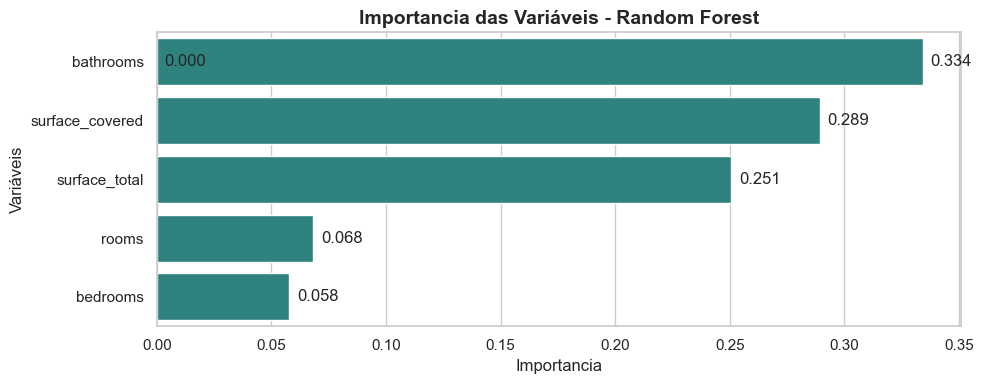

In [34]:
# 3. Importância das Variáveis (seaborn + labels + alta resolução)
# ---------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar DataFrame tidy para seaborn
df_imp = pd.DataFrame({
    'feature': feat_importances.index,
    'importance': feat_importances.values
}).reset_index(drop=True)
# agregar columna hue constante para evitar la advertencia de palette sin hue
df_imp['hue'] = 'importance'

plt.figure(figsize=(10, max(4, 0.3 * len(features))))
ax = sns.barplot(data=df_imp, x='importance', y='feature', hue='hue', dodge=False, palette='viridis')
# Eliminar leyenda de forma segura
if ax.get_legend() is not None:
    ax.get_legend().remove()

ax.set_title('Importancia das Variáveis - Random Forest', fontsize=14, fontweight='bold')
ax.set_xlabel('Importancia')
ax.set_ylabel('Variáveis')

# Añadir etiquetas numéricas al final de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + max(vals) * 0.01, p.get_y() + p.get_height() / 2, f'{width:.3f}', va='center')

plt.tight_layout()

import os
os.makedirs('reports/figures', exist_ok=True)
plt.savefig('reports/figures/feature_importance_rf.png', bbox_inches='tight', dpi=300)
plt.show()

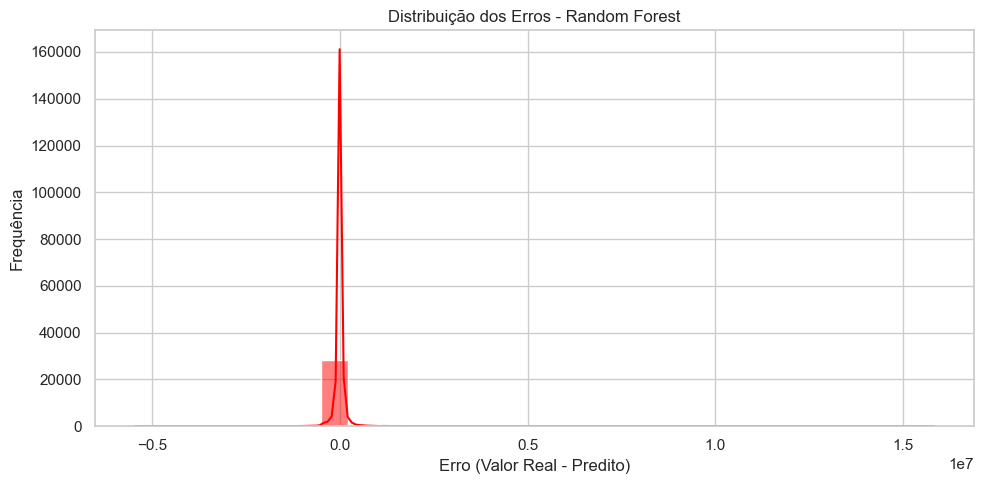

In [35]:
# 4. Distribuição dos Erros do Modelo
# ---------------------------------------------------
# Obs: você precisa salvar também os valores reais e previstos no notebook principal
try:
    y_test = pd.read_csv("y_test.csv")["valor"]
    y_pred_rf = pd.read_csv("y_pred_rf.csv")["valor"]
    
    erros = y_test - y_pred_rf
    
    plt.figure(figsize=(10, 5))
    sns.histplot(erros, kde=True, color="red", bins=30)
    plt.title("Distribuição dos Erros - Random Forest")
    plt.xlabel("Erro (Valor Real - Predito)")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()
except FileNotFoundError:
    print("Aviso: Arquivos 'y_test.csv' e 'y_pred_rf.csv' não encontrados. "
          "Se quiser analisar erros, salve os dados no notebook principal.")


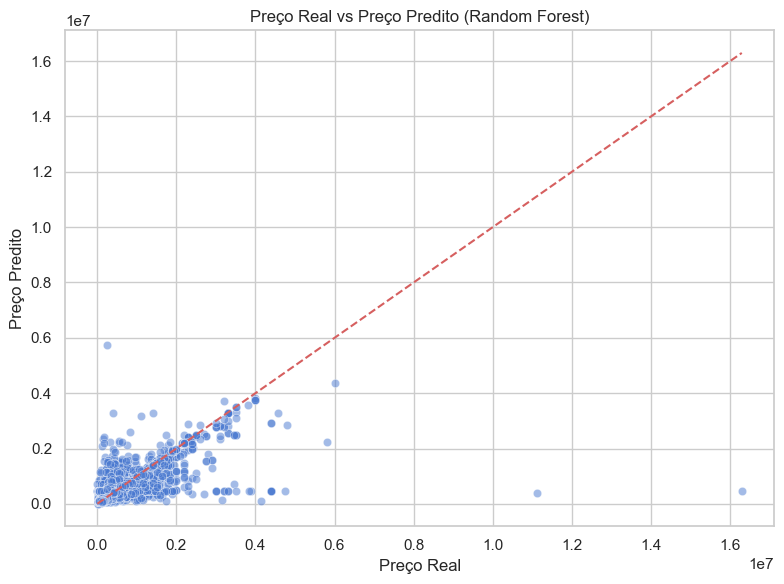

In [36]:
# 5. Relação Preço Real vs Preço Predito
# ---------------------------------------------------
try:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.title("Preço Real vs Preço Predito (Random Forest)")
    plt.xlabel("Preço Real")
    plt.ylabel("Preço Predito")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Aviso: Não foi possível plotar Preço Real vs Predito:", e)